<a href="https://colab.research.google.com/github/lourdesvaca/repository-algoritmica-avanzada-2023-2/blob/algoritmica-avanzada/Credit_card_customersDecissionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('BankChurners.csv')

In [36]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [37]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [38]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [ ]:
data.tail(10)

In [ ]:
data.dtypes

In [40]:
data.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [54]:
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [42]:
data.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [43]:
data.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [44]:
data.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [45]:
data.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

Luego de analizar la data procederemos a limpiar

Deberá eliminar columnas que vea innecesarias y mapear las columnas categóricas

In [ ]:
clean = data.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [49]:
data.Income_Category= data.Income_Category.map({'$60K - $80K':1, 'Less than $40K':2, '$80K - $120K':3, '$40K - $60K':4,'$120K +':5, 'Unknown':6})

In [47]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [50]:
data.Marital_Status= data.Marital_Status.map({'Married':1, 'Single':2, 'Unknown':3, 'Divorced':4})

In [51]:
data.Attrition_Flag = data.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':2})

In [52]:
data['Card_Category'] = data.Card_Category.map({'Blue':1, 'Gold':2, 'Silver':3, 'Platinum':4})

In [53]:
data['Education_Level'] = data.Education_Level.map({'High School':1, 'Graduate':2, 'Uneducated':3, 'Unknown':4, 'College':5,'Post-Graduate':6, 'Doctorate':7})

In [55]:
data['Gender'] = data.Gender.map({'M':1, 'F':2})

In [56]:
data.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category             float64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [57]:
data.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,1.160660,46.325960,1.529081,2.346203,2.974622,1.758862,NaN,1.126987,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.680730,0.879864,NaN,0.482019,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,1.000000,26.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,1.000000,1.000000,2.000000,1.000000,NaN,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,2.000000,3.000000,4.000000,2.000000,NaN,1.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,2.000000,73.000000,2.000000,5.000000,7.000000,4.000000,NaN,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
#clean = data.drop(['CLIENTNUM'], axis=1, inplace=True)

In [58]:
corr = round(data.corr(), 4)
corr.style.background_gradient()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,0.018200,0.037300,0.019000,0.026000,0.016600,nan,-0.003700,0.013700,-0.150000,0.152400,0.204500,-0.023900,-0.263100,-0.000300,-0.131100,-0.168600,-0.371400,-0.290100,-0.178400
Customer_Age,0.018200,1.000000,0.017300,-0.122300,-0.000900,-0.060100,nan,-0.019200,0.788900,-0.010900,0.054400,-0.018500,0.002500,0.014800,0.001200,-0.062000,-0.046400,-0.067100,-0.012100,0.007100
Gender,0.037300,0.017300,1.000000,-0.004600,0.012100,0.005600,nan,-0.080200,0.006700,-0.003200,0.011200,-0.040000,-0.420800,-0.029700,-0.418100,-0.026700,-0.024900,0.067500,0.005800,0.257900
Dependent_count,0.019000,-0.122300,-0.004600,1.000000,0.010400,0.008200,nan,0.023300,-0.103100,-0.039100,-0.010800,-0.040500,0.068100,-0.002700,0.068300,-0.035400,0.025000,0.049900,0.011100,-0.037100
Education_Level,0.026000,-0.000900,0.012100,0.010400,1.000000,0.014700,nan,0.006300,-0.001400,-0.006100,-0.001400,-0.005100,0.001100,-0.019400,0.002800,-0.003600,-0.009100,-0.002500,-0.012000,-0.012000
Marital_Status,0.016600,-0.060100,0.005600,0.008200,0.014700,1.000000,nan,0.036800,-0.043000,-0.006900,0.003600,-0.008700,0.053100,-0.024100,0.055200,-0.037000,0.049700,0.093200,-0.013500,-0.044900
Income_Category,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Card_Category,-0.003700,-0.019200,-0.080200,0.023300,0.006300,0.036800,nan,1.000000,-0.014300,-0.081500,-0.017000,-0.000700,0.497500,0.019000,0.495700,0.005000,0.186000,0.123800,-0.005900,-0.208600
Months_on_book,0.013700,0.788900,0.006700,-0.103100,-0.001400,-0.043000,nan,-0.014300,1.000000,-0.009200,0.074200,-0.010800,0.007500,0.008600,0.006700,-0.049000,-0.038600,-0.049800,-0.014100,-0.007500
Total_Relationship_Count,-0.150000,-0.010900,-0.003200,-0.039100,-0.006100,-0.006900,nan,-0.081500,-0.009200,1.000000,-0.003700,0.055200,-0.071400,0.013700,-0.072600,0.050100,-0.347200,-0.241900,0.040800,0.067700


<Axes: >

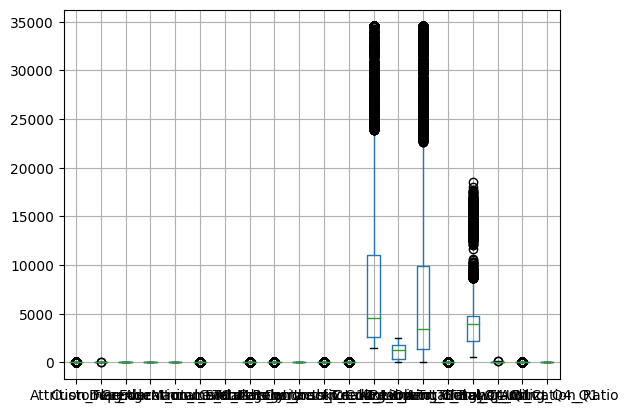

In [59]:
data.boxplot()

In [31]:
clean.dtypes

AttributeError: ignored

In [29]:
data.Gender.unique()

array(['M', 'F'], dtype=object)